In [1]:

import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = [] # empty list of python
file_name = 'Label.txt'
with open(file_name,'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')
  #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


## Setting input sizes

In [8]:

model.setInputSize(320,320)
model.setInputScale(1.0/127.5) # 255/2= 127.5
model.setInputMean((127.5,127.5,127.5)) # mobilenet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 0FA3B650>

## Reading Image

In [9]:
img = cv2.imread('Images\Street.jpg')

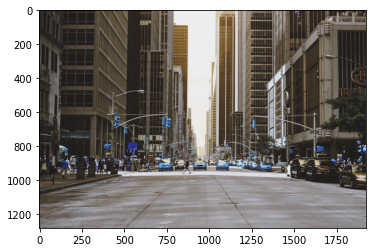

In [10]:
plt.imshow(img) # BGR

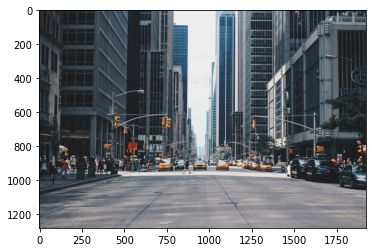

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Testing Model On Image

In [12]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.55)

In [13]:
print(ClassIndex)

[[ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [10]
 [ 1]
 [ 1]
 [ 3]]


In [14]:
for i in range(len(ClassIndex)):
    print(classLabels[ClassIndex[i][0]-1])

person
car
person
person
car
car
traffic light
car
traffic light
person
car
car
person
car
traffic light
person
person
car


In [15]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(), bbox):
    #cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
    cv2.rectangle(img, boxes, (0,0,255), 10)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0, 255, 0), thickness=3 )

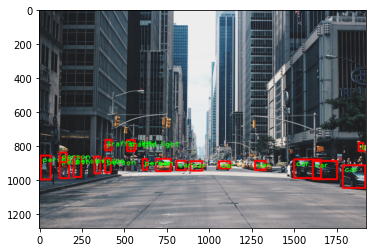

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Testing Model On Video

In [17]:
#cap = cv2.VideoCapture('jnjk')

# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame, boxes, (0,0,255), 10)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0, 255, 0), thickness=15 )                


    cv2.imshow('Object Detection Tutorial', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined